<a href="https://colab.research.google.com/github/sijuswamy/AIML_Files/blob/main/MLP_MNIST_std_with_montage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Layer Perceptron Classification Model for MNIST Dataset

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. There have been a number of scientific papers on attempts to achieve the lowest error rate; one paper, using a hierarchical system of convolutional neural networks, manages to get an error rate on the MNIST database of 0.23%. The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support-vector machine to get an error rate of 0.8%. An extended dataset similar to MNIST called EMNIST has been published in 2017, which contains 240,000 training images, and 40,000 testing images of handwritten digits and characters. We can recognize the images using our eyes with our pre-knowledge.

Neural networks approach the problem in a different way. The idea is to take a large number of handwritten digits, known as training examples, and then develop a system which can learn from those training examples. In other words, the neural network uses the examples to automatically infer rules for recognizing handwritten digits. Furthermore, by increasing the number of training examples, the network can learn more about handwriting, and so improve its accuracy. So a NN could build a better handwriting recognizer by using thousands or even millions or billions of training examples.


## Stages in Model design & Development
1. Importing libraries & dataset
2. Data preprocessing
3. Network model design
4. Compile the model
5. Train the model
6. Performance evaluation & reporting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing Libraries**


In [ ]:
import numpy as np
import tensorflow
import matplotlib.pyplot as plt

# **Load Data**


In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


# **Checkout the Data**

In [ ]:
print('Training data shape: ', train_images.shape, train_labels.shape)
print('Testing data shape: ', test_images.shape, test_labels.shape)
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs: ', nClasses)
print('Output classes: ', classes)


Training data shape:  (60000, 28, 28) (60000,)
Testing data shape:  (10000, 28, 28) (10000,)
Total number of outputs:  10
Output classes:  [0 1 2 3 4 5 6 7 8 9]


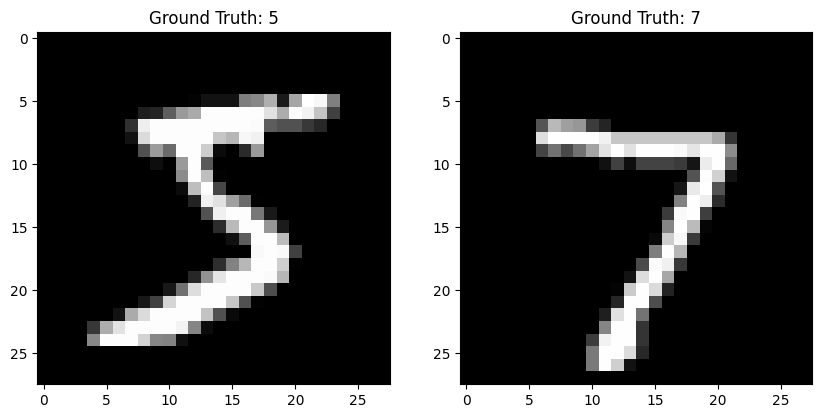

In [ ]:
plt.figure(figsize=[10, 5])
plt.subplot(121)
plt.imshow(train_images[0], cmap='gray')
plt.title('Ground Truth: {}'.format(train_labels[0]))
plt.subplot(122)
plt.imshow(test_images[0], cmap='gray')
plt.title('Ground Truth: {}'.format(test_labels[0]))
plt.show()

##`Showing pixel values of a sample grayscale image`


In [ ]:
print(train_images[0])
print('Digit :{}'.format(train_labels[0]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

##`Frequency distribution of pixel values of a sample image`

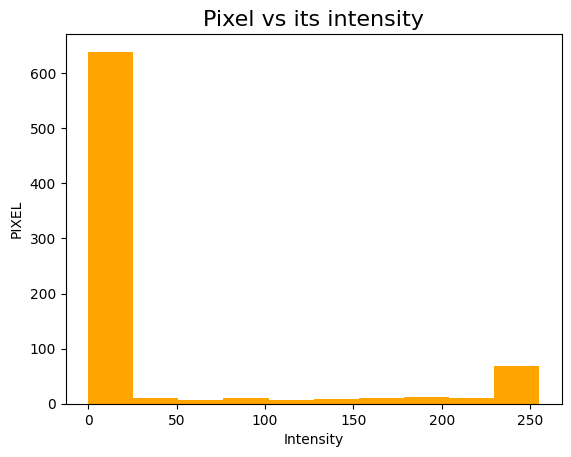

In [ ]:
plt.hist(train_images[0].reshape(784),facecolor='orange')
plt.title('Pixel vs its intensity',fontsize=16)
plt.ylabel('PIXEL')
plt.xlabel('Intensity')
plt.show()

##` Showing the sample image as a picture`

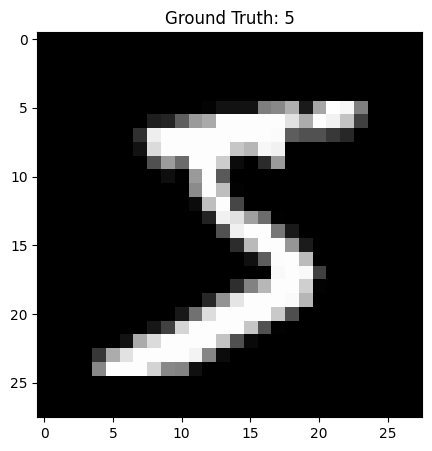

In [ ]:
plt.figure(figsize=[10, 5])
plt.imshow(train_images[0], cmap='gray')
plt.title('Ground Truth: {}'.format(train_labels[0]))
plt.show()

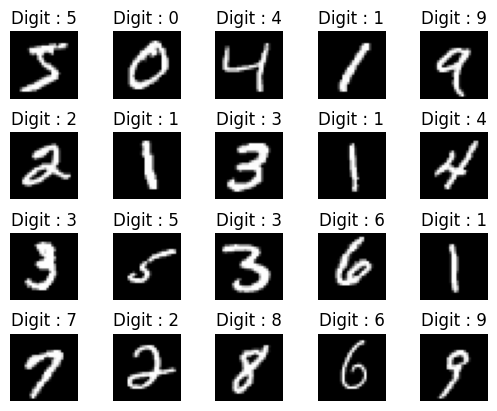

In [ ]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(train_images[i],cmap='gray')
  plt.title("Digit : {}".format(train_labels[i]))
  plt.subplots_adjust(hspace=0.5)
  plt.axis('off')

# **Data Preprocessing**

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
from tensorflow.keras.utils import to_categorical
print('Original label: ', train_labels[0])
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print('After conversion to categorical (one-hot): ', train_labels[0])

Original label:  5
After conversion to categorical (one-hot):  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# **Create the Network**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(512, activation='relu'))
model.add(Dense(286, activation='relu'))
model.add(Dense(164, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 286)               146718    
                                                                 
 dense_2 (Dense)             (None, 164)               47068     
                                                                 
 dense_3 (Dense)             (None, 10)                1650      
                                                                 
Total params: 597,356
Trainable params: 597,356
Non-trainable params: 0
_________________________________________________________________


## **Configure the Network**

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',  metrics=['accuracy'])
#adam, adadelta, SGD

# **Train the Network**

In [ ]:
#history = model.fit(train_images, train_labels, batch_size=256, epochs=10, verbose=1,validation_data=(test_images,test_labels))
history = model.fit(train_images, train_labels, batch_size=256, epochs=10, verbose=1, validation_split=0.33)

Epoch 1/10
158/158 [==============================] - 8s 8ms/step - loss: 0.3450 - accuracy: 0.9019 - val_loss: 0.2551 - val_accuracy: 0.9181
Epoch 2/10
158/158 [==============================] - 1s 5ms/step - loss: 0.1238 - accuracy: 0.9635 - val_loss: 0.1319 - val_accuracy: 0.9613
Epoch 3/10
158/158 [==============================] - 1s 5ms/step - loss: 0.0698 - accuracy: 0.9783 - val_loss: 0.1087 - val_accuracy: 0.9667
Epoch 4/10
158/158 [==============================] - 1s 6ms/step - loss: 0.0460 - accuracy: 0.9860 - val_loss: 0.0934 - val_accuracy: 0.9721
Epoch 5/10
158/158 [==============================] - 1s 5ms/step - loss: 0.0289 - accuracy: 0.9914 - val_loss: 0.0913 - val_accuracy: 0.9745
Epoch 6/10
158/158 [==============================] - 1s 5ms/step - loss: 0.0240 - accuracy: 0.9922 - val_loss: 0.1132 - val_accuracy: 0.9706
Epoch 7/10
158/158 [==============================] - 1s 6ms/step - loss: 0.0200 - accuracy: 0.9935 - val_loss: 0.1123 - val_accuracy: 0.9711
Epoch 

# **Plot the Loss and Accuracy Curves**

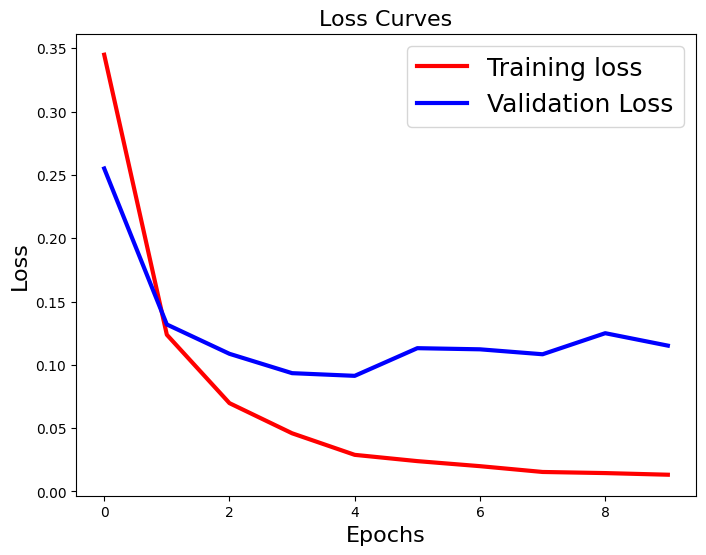

In [ ]:
plt.figure(figsize=[8, 6])
plt.plot(history.history['loss'], 'r', linewidth=3.0)
plt.plot(history.history['val_loss'], 'b', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'], fontsize=18,loc='upper right')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)
plt.show()

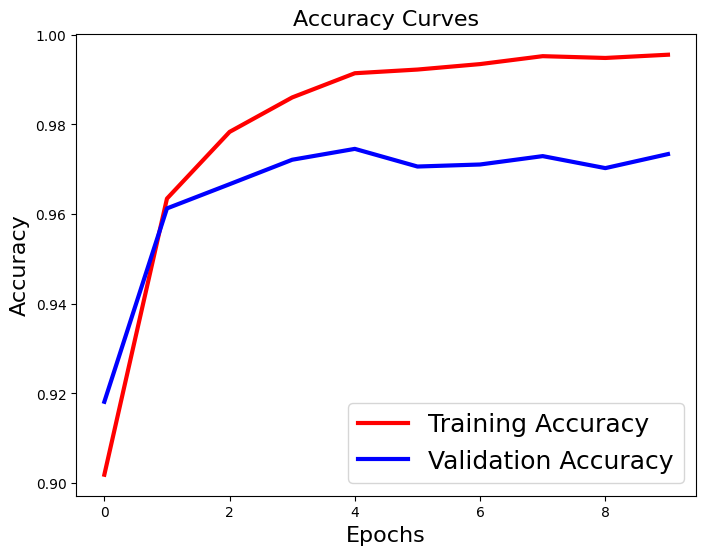

In [ ]:
plt.figure(figsize=[8, 6])
plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
plt.plot(history.history['val_accuracy'], 'b', linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=18,loc='lower right')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)
plt.show()

# **Evaluate the Trained Network on Test Data**

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0942 - accuracy: 0.9775


In [ ]:
print('Test Loss:', test_loss)
print('Test Accuracy: ', test_accuracy)

Test Loss: 0.0942273810505867
Test Accuracy:  0.9775000214576721


# **Prediction**

In [ ]:
prediction = model.predict(test_images[127:128])
print(prediction)
predicted_class = np.argmax(prediction[0])
print('Prediction: {}'.format(predicted_class))

1/1 [==============================] - 0s 102ms/step
[[5.2465904e-13 1.5903225e-09 9.7229759e-12 1.6595076e-08 5.3246778e-14
  9.9999988e-01 5.0242015e-09 1.6744405e-13 8.6588372e-08 9.4148578e-10]]
Prediction: 5


# **Ground Truth**

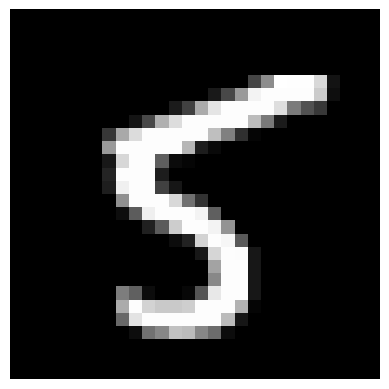

In [ ]:
plt.imshow(test_images[127], cmap='gray')
plt.axis('off')
plt.show()

# **User Input**

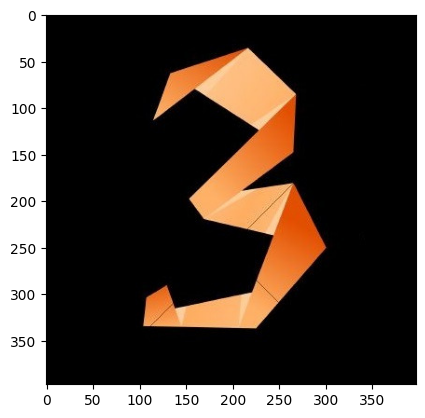

In [ ]:
import cv2
image_bgr = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Mathematics For Machine Learning/digit.jpg', cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('on')
plt.show()

# **Convert to Grayscale and Resize**

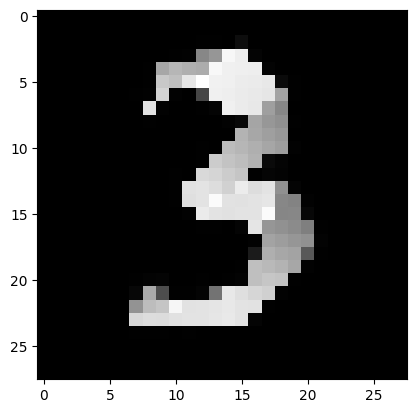

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Mathematics For Machine Learning/digit.jpg', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28, 28))
plt.imshow(image_resized, cmap='gray')
plt.axis('on')
plt.show()
image_resized = image_resized / 255.0

# **Prediction**

In [ ]:
test = np.expand_dims(image_resized, axis=0)
prediction = model.predict(test)
predicted_class = np.argmax(prediction[0])
print('Prediction : {}'.format(predicted_class))

1/1 [==============================] - 0s 21ms/step
Prediction : 3


# **Saving and Loading Model**

**Saving a Model**

In [ ]:
model_json = model.to_json()
with open('/content/drive/My Drive/Colab Notebooks/mlp_model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('/content/drive/My Drive/Colab Notebooks/mlp_model.h5')
print('Saved model to disk')

Saved model to disk


**Loading a Model**

In [ ]:
from tensorflow.keras.models import model_from_json
json_file = open('/content/drive/My Drive/Colab Notebooks/mlp_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('/content/drive/My Drive/Colab Notebooks/mlp_model.h5')
print('Loaded model from disk')

Loaded model from disk


**Evaluate Loaded Model on Test Data**

In [ ]:
loaded_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
test_loss, test_accuracy = loaded_model.evaluate(test_images, test_labels)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0942 - accuracy: 0.9775
Test Loss: 0.0942273810505867
Test Accuracy: 0.9775000214576721


# Visualization of Power of the Model

##` A glance of model performance on test images`

In [ ]:
LabelNames= [ "zero","one","two","three","four","five","six","seven","eight","nine" ]


1/1 [==============================] - 0s 17ms/step


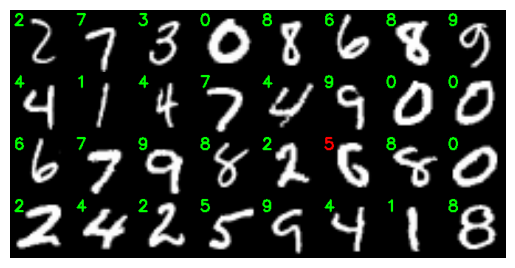

In [ ]:
from imutils import build_montages
import matplotlib.pyplot as plt
import cv2

images = []
for i in np.random.choice(np.arange(0, len(test_labels)), size=32):
  test = np.expand_dims(test_images[i], axis=0)
  prediction = model.predict(test)
  predicted_class = np.argmax(prediction[0])
  image = (test_images[i] * 255).astype("uint8")
  color = (0, 255, 0)
  if predicted_class != np.argmax(test_labels[i]):
    color = (0, 0, 255)
  image = cv2.merge([image] * 3)
  image = cv2.resize(image, (84, 84))
  cv2.putText(image, str(predicted_class), (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)
  images.append(image)
montage = build_montages(images, (84, 84), (8, 4))[0]
montage_rgb = cv2.cvtColor(montage, cv2.COLOR_BGR2RGB)
plt.imshow(montage_rgb)
plt.axis('off')
plt.show()

##`Selecting a file from the machine/ cloud`

In [ ]:
from google.colab import files
uploaded = files.upload()

##`Displaying the loaded image`

In [ ]:
from IPython.display import Image
Image('7image.png',width=250,height=250)


FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

##` Classify the uploaded image using trained model`

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

ImportError: ignored

In [ ]:
def load_image(filename):
	# load the image
	img = load_img(filename, color_mode="grayscale", target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

In [ ]:
img = load_image('7image.png')
prediction=model.predict(img)
predicted_class = np.argmax(prediction[0])
print('Predicted value : ',predicted_class)

In [ ]:
plt.imshow(img.reshape(28,28))
plt.title("Predicted as {} with Probability {:.2f}%".format(LabelNames[predicted_class],np.max(prediction[0])*100))
plt.show()